In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

# Charger les datasets
boston =pd.read_csv("boston.csv")
mushrooms=pd.read_csv("mushrooms.csv")

# Charger les fichiers .txt qui ont été envoyés par e-mail.
train_data = pd.read_csv("traindat.txt", delimiter="\s+", engine="python")
test_data = pd.read_csv("testdat.txt", delimiter="\s+", engine="python")


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dell\AppData\Local\Temp\ipykernel_13800\3144240343.py:14: SyntaxWarning: invalid escape sequence '\s'
  train_data = pd.read_csv("traindat.txt", delimiter="\s+", engine="python")
C:\Users\dell\AppData\Local\Temp\ipykernel_13800\3144240343.py:15: SyntaxWarning: invalid escape sequence '\s'
  test_data = pd.read_csv("testdat.txt", delimiter="\s+", engine="python")


In [4]:
mushrooms.head()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
### 1️⃣ Préparation des données

## Dataset 1 : Boston House Prices (Régression)
X_boston = boston.drop(columns=["MEDV"])  # Supprimer la variable cible
y_boston = boston["MEDV"]  # Variable cible

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)


## Dataset 2 : Mushroom Classification (Classification)
X_mushroom = mushrooms.drop(columns=["class"])
y_mushroom = mushrooms["class"]

# Encoder les variables catégorielles
from sklearn.preprocessing import LabelEncoder
X_mushroom = X_mushroom.apply(LabelEncoder().fit_transform)
y_mushroom = LabelEncoder().fit_transform(y_mushroom)

X_train_mushroom, X_test_mushroom, y_train_mushroom, y_test_mushroom = train_test_split(X_mushroom, y_mushroom, test_size=0.2, random_state=42)

## Dataset 3 : Fichier envoyé par e-mail (Régression)
X_train_email = train_data.iloc[:, 1:]  # Toutes les colonnes sauf la première
y_train_email = train_data.iloc[:, 0]   # Première colonne = variable cible

X_test_email = test_data.iloc[:, 1:]
y_test_email = test_data.iloc[:, 0]

In [6]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_boston = scaler.fit_transform(X_train_boston)
X_test_boston = scaler.transform(X_test_boston)


scaler = StandardScaler()
X_train_email = scaler.fit_transform(X_train_email)
X_test_email = scaler.transform(X_test_email)


C:\Users\dell\AppData\Local\Temp\ipykernel_13800\1829099377.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_mushroom, palette="Set2", ax=axes[1])


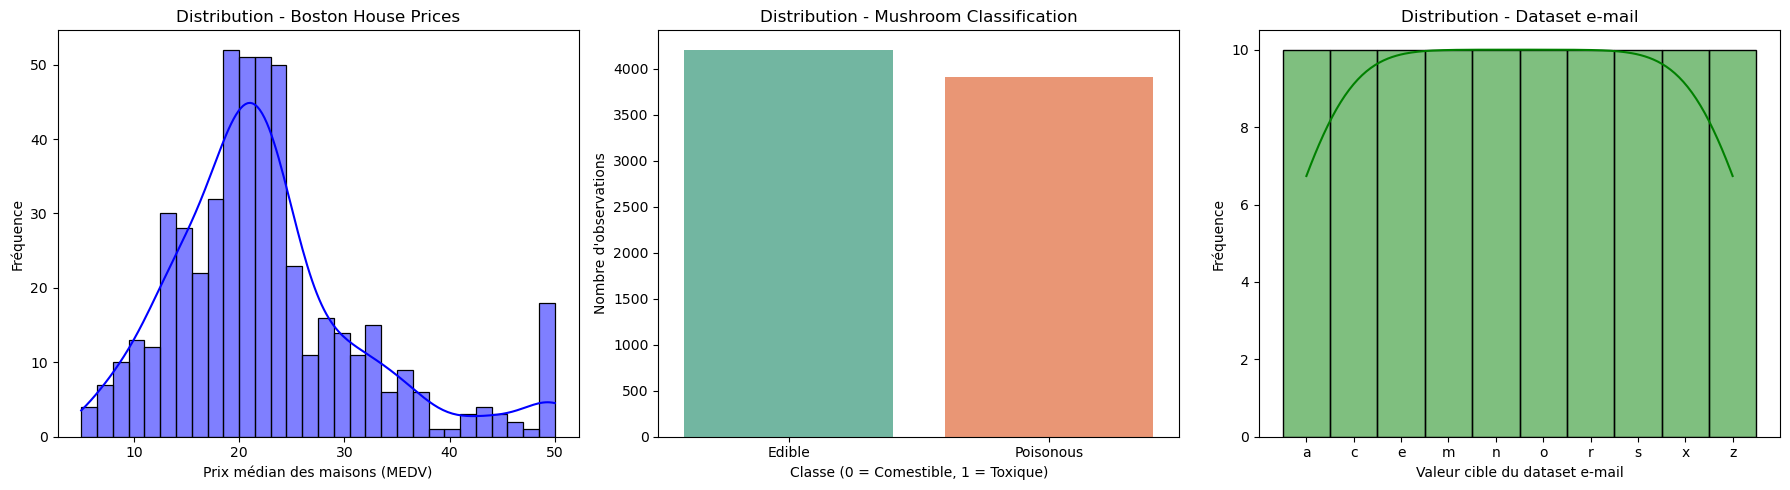

In [7]:
# la visualisation de la distribution des variables cibles
# Création d'une figure avec 3 sous-graphiques sur une ligne
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 📌 1- Distribution de la variable cible - Boston House Prices
sns.histplot(y_boston, bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_xlabel("Prix médian des maisons (MEDV)")
axes[0].set_ylabel("Fréquence")
axes[0].set_title("Distribution - Boston House Prices")

# 📌 2- Distribution de la variable cible - Mushroom Classification
sns.countplot(x=y_mushroom, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Classe (0 = Comestible, 1 = Toxique)")
axes[1].set_ylabel("Nombre d'observations")
axes[1].set_title("Distribution - Mushroom Classification")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Edible", "Poisonous"])

# 📌 3- Distribution de la variable cible - Dataset e-mail
sns.histplot(y_train_email, bins=30, kde=True, color="green", ax=axes[2])
axes[2].set_xlabel("Valeur cible du dataset e-mail")
axes[2].set_ylabel("Fréquence")
axes[2].set_title("Distribution - Dataset e-mail")

# Ajustement des espacements
plt.tight_layout()
plt.show()


## 📊 Interprétation des distributions des variables cibles

### 1️⃣ Boston House Prices (Régression)
- La distribution des prix des maisons (**MEDV**) est **asymétrique à droite**, avec un pic autour de **20-25k $**.  
- On observe quelques valeurs extrêmes (**outliers**) proches de **50k $**, ce qui peut influencer les modèles de régression.

### 2️⃣ Mushroom Classification (Classification)
- La répartition entre **champignons comestibles et toxiques** est **quasiment équilibrée**.  
- Cela signifie que le dataset ne souffre pas d'un problème majeur de **déséquilibre de classes**, ce qui est favorable pour l'entraînement d'un modèle de classification.

### 3️⃣ Dataset e-mail (Régression)
- La distribution de la variable cible est **uniforme**, ce qui signifie que toutes les valeurs apparaissent avec **la même fréquence**.  
- Cela peut indiquer un **jeu de données synthétique** ou un phénomène spécifique nécessitant une analyse approfondie.  
- Contrairement aux autres datasets, il n'y a pas de **tendance claire** dans la répartition des valeurs.



In [9]:
### 2️⃣ Entraînement des modèles

# Boston House Prices (Régression)
regressor_boston = DecisionTreeRegressor(random_state=42)
regressor_boston.fit(X_train_boston, y_train_boston)


# Mushroom Classification (Classification)
classifier_mushroom = DecisionTreeClassifier(random_state=42)
classifier_mushroom.fit(X_train_mushroom, y_train_mushroom)


# Dataset e-mail (Régression)
# Encoder la variable cible du dataset e-mail
label_encoder_email = LabelEncoder()
y_train_email = label_encoder_email.fit_transform(y_train_email)
y_test_email = label_encoder_email.transform(y_test_email)

regressor_email = DecisionTreeRegressor(random_state=42)
regressor_email.fit(X_train_email, y_train_email)



DecisionTreeRegressor(random_state=42)

In [10]:
# !pip install graphviz
import graphviz
print(graphviz.__path__)


['D:\\anaconda\\Lib\\site-packages\\graphviz']


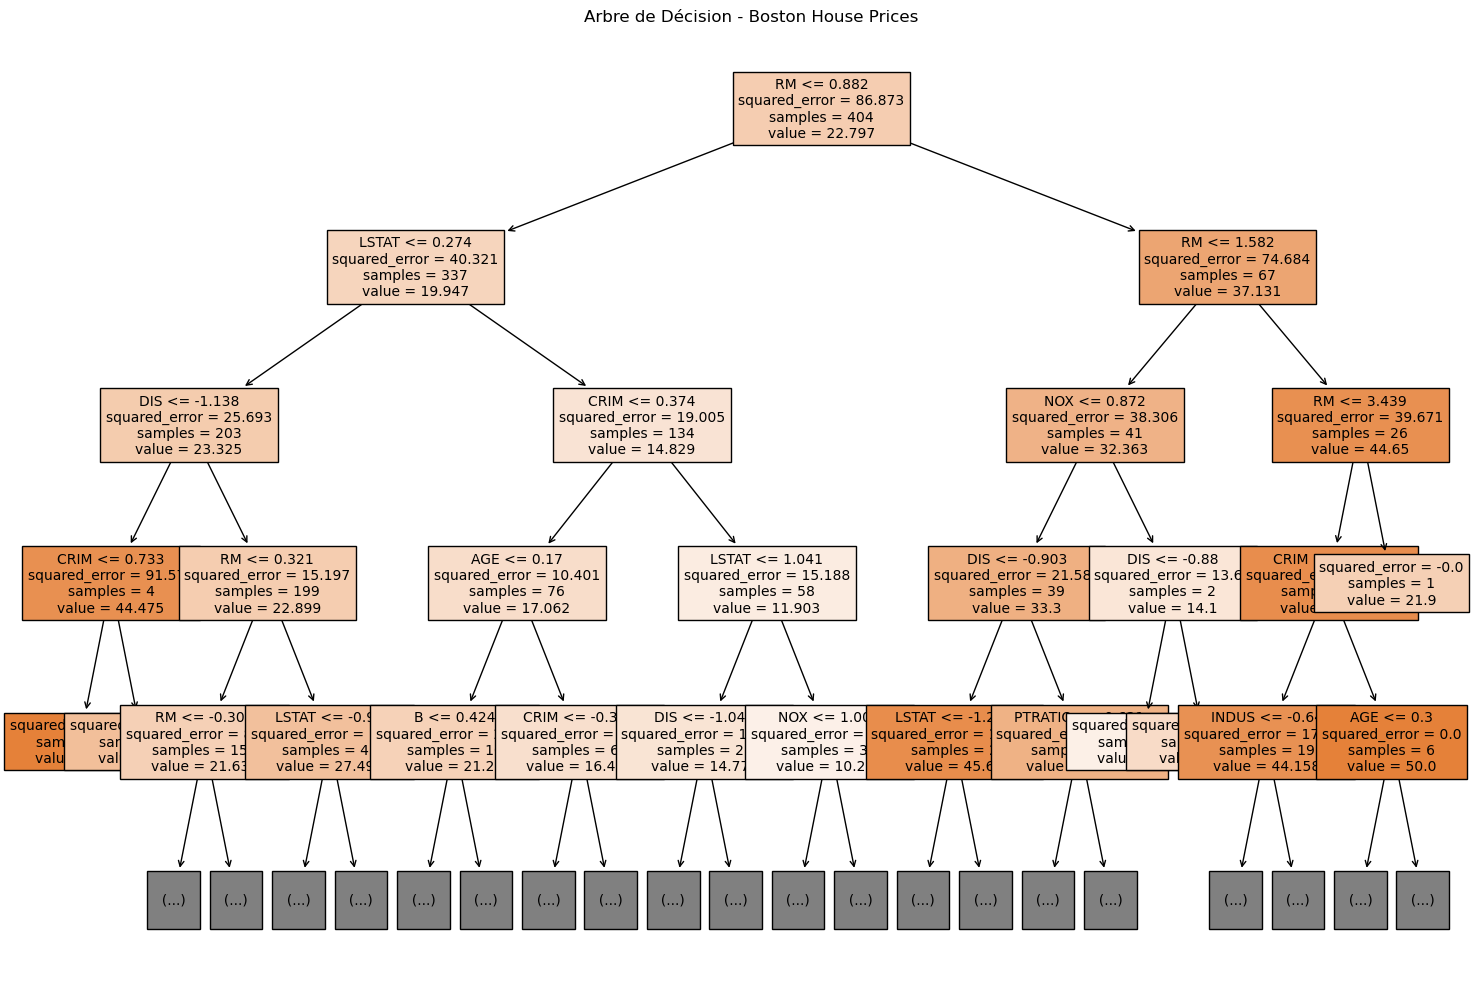

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

### 3️⃣ Visualisation des Arbres de Décision

# 📊 Boston House Prices (Régression)
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor_boston, filled=True, fontsize=10, 
               feature_names=X_boston.columns.tolist(),max_depth=4)  
plt.title("Arbre de Décision - Boston House Prices")
plt.tight_layout()
plt.show()


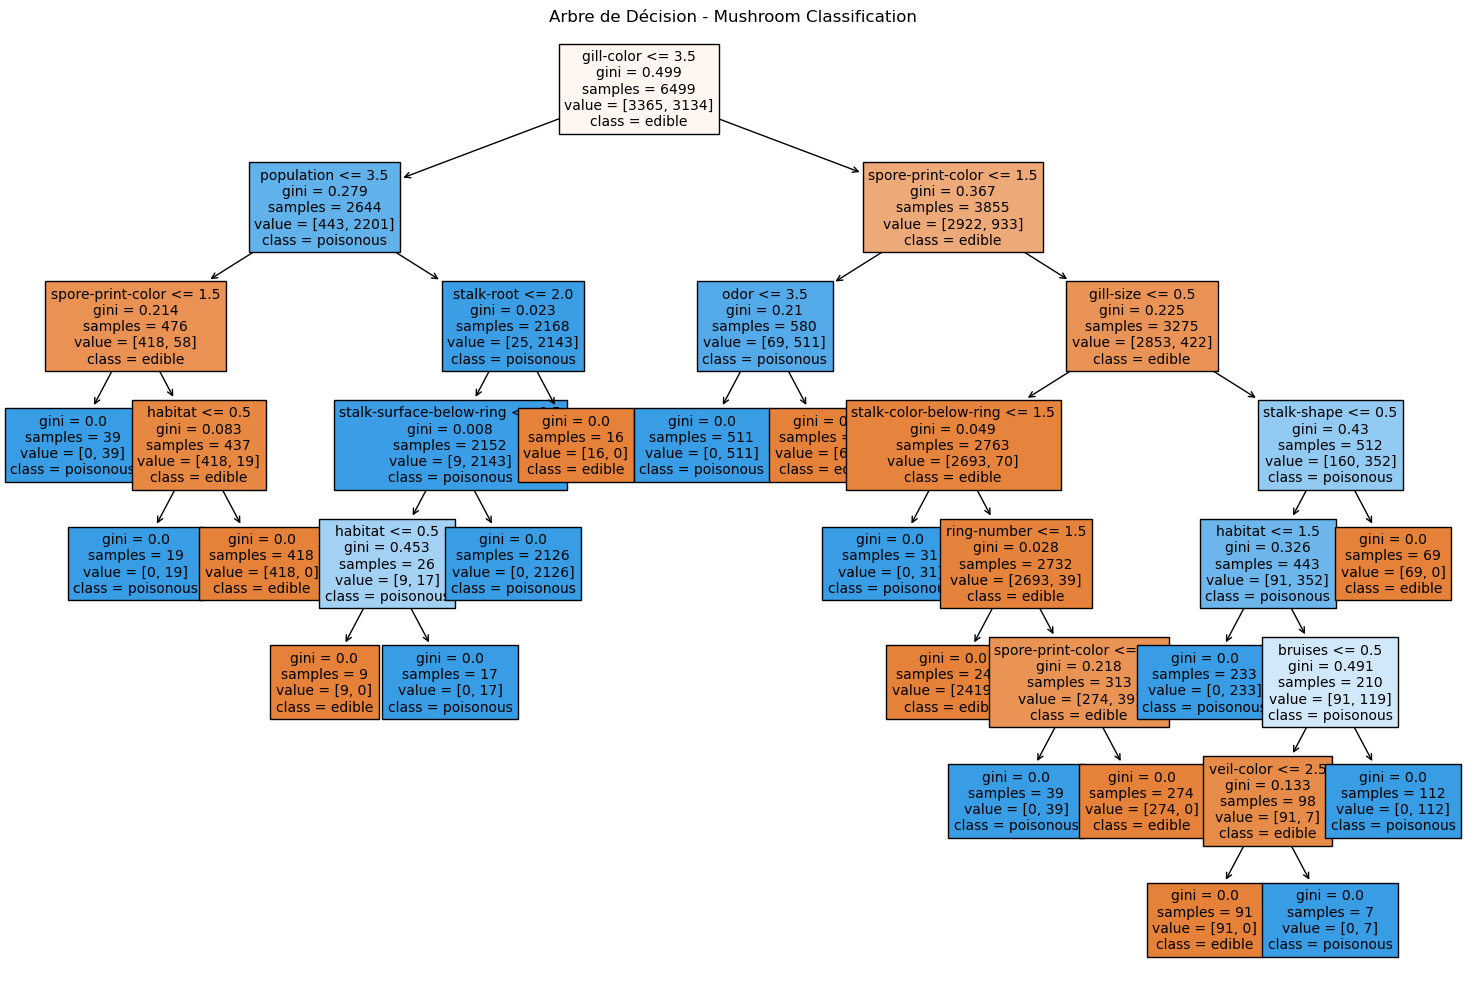

In [12]:
# 🍄 Mushroom Classification (Classification)
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier_mushroom, filled=True, fontsize=10, 
               feature_names=X_mushroom.columns.tolist(),  
               class_names=["edible", "poisonous"])  
plt.title("Arbre de Décision - Mushroom Classification")
plt.tight_layout()
plt.show()

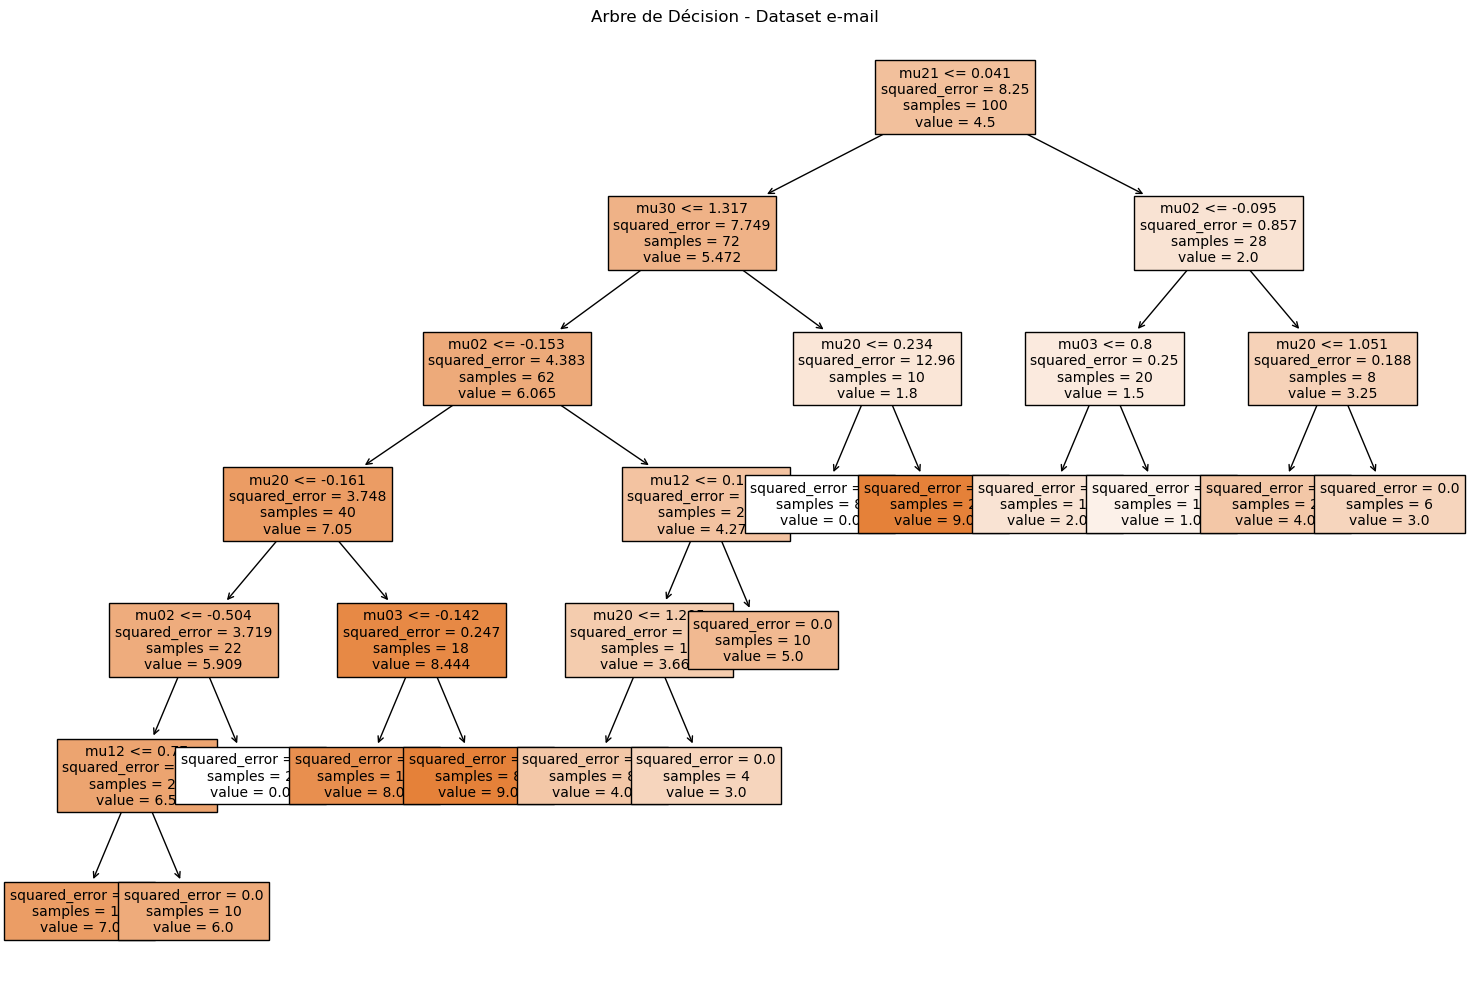

In [13]:

X_train_email = pd.DataFrame(X_train_email, columns=train_data.columns[1:])  
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor_email, filled=True, fontsize=10, 
               feature_names=X_train_email.columns.tolist())  
plt.title("Arbre de Décision - Dataset e-mail")
plt.tight_layout()
plt.show()


# 📊 Interprétation des Arbres de Décision

## 1️⃣ Arbre de Décision - Prix des Maisons à Boston 🏡
L'arbre de décision pour la régression des prix des maisons à Boston permet de prédire la valeur des biens immobiliers en fonction de plusieurs caractéristiques (ex. `CRIM`, `RM`, `LSTAT`).  

- Chaque **nœud** représente un critère de séparation basé sur une caractéristique (ex. `LSTAT <= 0.274`).
- Les **feuilles** affichent les valeurs moyennes prédites pour les groupes de maisons.
- Plus la **couleur** d'un nœud est foncée, plus la valeur moyenne est élevée.
- Une **profondeur** plus importante indique des subdivisions plus précises, mais risque de sur-apprendre sur les données d'entraînement.

---

## 2️⃣ Arbre de Décision - Classification des Champignons 🍄
Cet arbre de classification distingue les champignons comestibles et vénéneux sur la base de leurs caractéristiques physiques.  

- Chaque **nœud** représente un test de décision sur une caractéristique (ex. `gill-color <= 3.5`).
- Les **feuilles** indiquent la classe prédite (`edible` ou `poisonous`).
- La métrique **Gini** mesure l'impureté de chaque nœud : plus elle est faible, plus les échantillons appartiennent majoritairement à une seule classe.
- Les couleurs **bleues** et **oranges** différencient les classes, facilitant l'interprétation.

---

## 3️⃣ Arbre de Décision - Dataset E-mail 📧
Ce modèle de régression tente de prédire une variable continue à partir des caractéristiques extraites des e-mails.  

- Les **nœuds internes** indiquent des divisions basées sur différentes caractéristiques (ex. `mu30 <= 1.317`).
- Chaque **feuille** affiche la valeur moyenne des échantillons restants.
- L'intensité des **couleurs** représente la valeur prédite : les teintes plus foncées indiquent des valeurs plus élevées.
- Cet arbre est plus **petit**, suggérant un modèle moins complexe ou des données avec moins de variations.

---

### 📌 Conclusion
Ces arbres montrent comment les décisions sont prises de manière hiérarchique pour la classification ou la régression. Une bonne visualisation permet de comprendre le fonctionnement du modèle et d'interpréter ses résultats.  
💡 **Pour éviter le sur-apprentissage**, il est important de limiter la profondeur de l'arbre ou d'appliquer une technique de régularisation comme l'élagage.



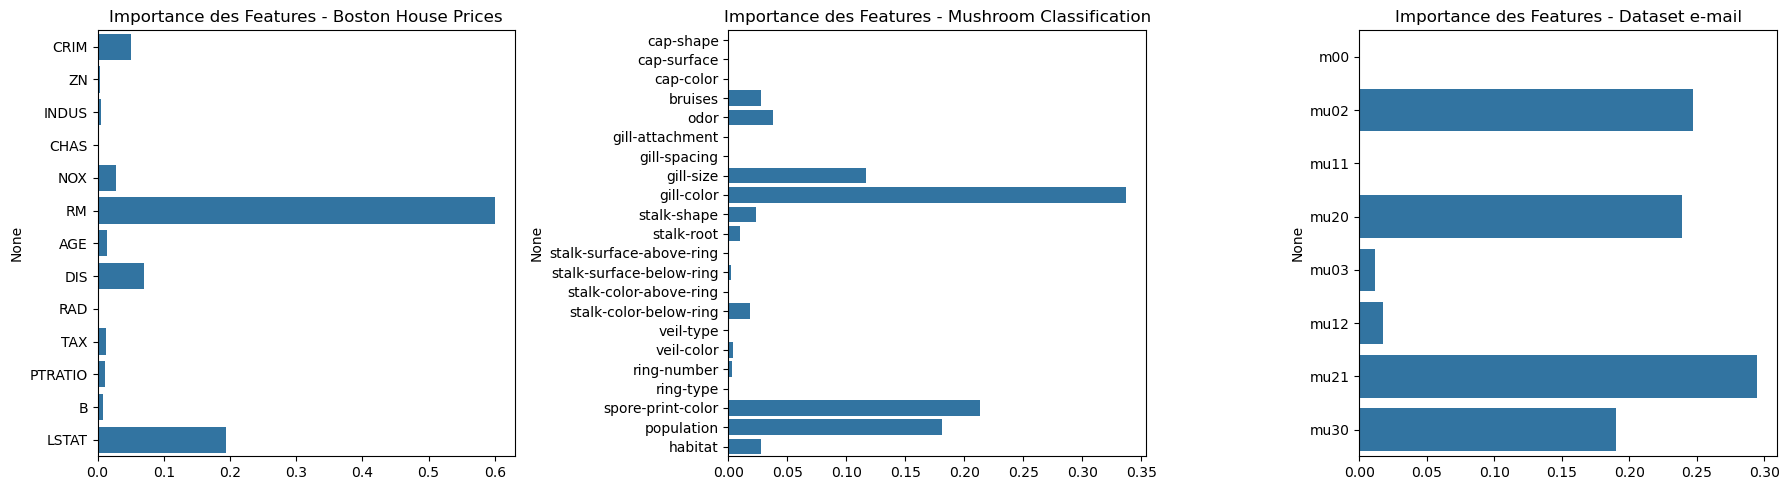

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec 3 sous-graphiques sur une seule ligne
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boston House Prices
sns.barplot(x=regressor_boston.feature_importances_, y=X_boston.columns, ax=axes[0])
axes[0].set_title("Importance des Features - Boston House Prices")

# Mushroom Classification
sns.barplot(x=classifier_mushroom.feature_importances_, y=X_mushroom.columns, ax=axes[1])
axes[1].set_title("Importance des Features - Mushroom Classification")

# Dataset e-mail
sns.barplot(x=regressor_email.feature_importances_, y=X_train_email.columns, ax=axes[2])
axes[2].set_title("Importance des Features - Dataset e-mail")

plt.tight_layout()
plt.show()

# 🔍 Analyse de l'Importance des Features

## 1️⃣ Importance des Features - Boston House Prices 🏡
- **RM (Nombre de pièces)** est le facteur le plus déterminant pour estimer le prix des maisons.
- **LSTAT (Population à faible revenu)** et **DIS (Proximité des centres d'emploi)** influencent également les prédictions.
- Les autres variables ont une importance plus faible.

## 2️⃣ Importance des Features - Mushroom Classification 🍄
- **Gill-color (Couleur des lamelles)** est la variable la plus déterminante.
- **Spore-print-color (Couleur des spores)** et **gill-size (Taille des lamelles)** jouent aussi un rôle majeur.
- Les autres caractéristiques ont un impact moindre sur la classification.

## 3️⃣ Importance des Features - Dataset E-mail 📧
- **mu21, mu02 et mu20** sont les caractéristiques les plus influentes.
- **mu30** contribue également de manière significative.
- D'autres variables comme **m00** ont une importance négligeable.

📌 **Conclusion**  
L'analyse des features permet de mieux comprendre les facteurs clés dans chaque modèle. Elle peut aussi guider l'optimisation et la sélection des variables pour améliorer les performances.


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Évaluation du modèle de régression (Boston House Prices)
y_pred_boston = regressor_boston.predict(X_test_boston)

print("🏡 Boston House Prices - Decision Tree Regression")
print(f"R² Score: {r2_score(y_test_boston, y_pred_boston):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_boston, y_pred_boston)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_boston, y_pred_boston):.4f}")
print("-" * 50)

# Évaluation du modèle de classification (Mushroom Classification)
y_pred_mushroom = classifier_mushroom.predict(X_test_mushroom)

print("🍄 Mushroom Classification - Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test_mushroom, y_pred_mushroom):.4f}")
print("Classification Report:\n", classification_report(y_test_mushroom, y_pred_mushroom))
print("Confusion Matrix:\n", confusion_matrix(y_test_mushroom, y_pred_mushroom))
print("-" * 50)

# Évaluation du modèle de régression (Dataset e-mail)
y_pred_email = regressor_email.predict(X_test_email)

print("📧 Dataset E-mail - Decision Tree Regression")
print(f"R² Score: {r2_score(y_test_email, y_pred_email):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_email, y_pred_email)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_email, y_pred_email):.4f}")
print("-" * 50)


🏡 Boston House Prices - Decision Tree Regression
R² Score: 0.8580
RMSE: 3.2274
MAE: 2.3941
--------------------------------------------------
🍄 Mushroom Classification - Decision Tree Classifier
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]
--------------------------------------------------
📧 Dataset E-mail - Decision Tree Regression
R² Score: -0.4182
RMSE: 3.4205
MAE: 2.2200
--------------------------------------------------


## 📊 Évaluation des Modèles d'Arbre de Décision  

### 🏡 Boston House Prices - Régression  
- **R² Score** : 0.8580 → Le modèle explique environ **85.8%** de la variance des prix des maisons, indiquant une bonne capacité de prédiction.  
- **RMSE** : 3.2274 → L'erreur moyenne quadratique est relativement faible, suggérant des prédictions assez précises.  
- **MAE** : 2.3941 → L'erreur absolue moyenne indique que, en moyenne, les prédictions sont à **environ 2.39 unités** des vraies valeurs.  

🔎 **Conclusion** : Le modèle est performant et offre des prédictions fiables avec une marge d'erreur acceptable.  

---

### 🍄 Mushroom Classification - Classification  
- **Accuracy** : 1.0000 (100%) → Le modèle classe parfaitement les champignons entre comestibles et toxiques.  
- **Matrice de confusion** : Aucune erreur de classification n'a été commise.  
- **Rapport de classification** : Précision, rappel et F1-score sont tous à **1.00**, montrant une performance idéale.  

🔎 **Conclusion** : Le modèle est **parfaitement précis**, ce qui est souvent attendu pour ce dataset bien structuré.  

---

### 📧 Dataset E-mail - Régression  
- **R² Score** : -0.4182 → Un score négatif indique que le modèle est **moins performant qu'une simple moyenne des valeurs cibles**.  
- **RMSE** : 3.4205 → L'erreur quadratique moyenne est élevée, suggérant que les prédictions sont peu précises.  
- **MAE** : 2.2200 → En moyenne, les prédictions sont **à 2.22 unités** des vraies valeurs.  

🔎 **Conclusion** : Le modèle ne parvient pas à bien expliquer les variations des données, indiquant probablement **un surajustement ou un mauvais choix de features**. Une amélioration est nécessaire (ex: **sélection de features, réglage des hyperparamètres**).  


In [41]:
### Random Forest###

# Importation des bibliothèques
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix

# 🔹 Boston House Prices - Régression
rf_regressor_boston = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_boston.fit(X_train_boston, y_train_boston)

# 🔹 Mushroom Classification - Classification
rf_classifier_mushroom = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_mushroom.fit(X_train_mushroom, y_train_mushroom)

# 🔹 Dataset E-mail - Régression
rf_regressor_email = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_email.fit(X_train_email, y_train_email)



RandomForestRegressor(random_state=42)

In [43]:
# Prédictions et évaluation
y_pred_boston = rf_regressor_boston.predict(X_test_boston)
print("🏡 Boston House Prices - Random Forest Regression")
print("R² Score:", r2_score(y_test_boston, y_pred_boston))
print("RMSE:", np.sqrt(mean_squared_error(y_test_boston, y_pred_boston)))
print("MAE:", mean_absolute_error(y_test_boston, y_pred_boston))
print("-" * 50)

y_pred_mushroom = rf_classifier_mushroom.predict(X_test_mushroom)
print("🍄 Mushroom Classification - Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test_mushroom, y_pred_mushroom))
print("Classification Report:\n", classification_report(y_test_mushroom, y_pred_mushroom))
print("Confusion Matrix:\n", confusion_matrix(y_test_mushroom, y_pred_mushroom))
print("-" * 50)

y_pred_email = rf_regressor_email.predict(X_test_email)
print("📧 Dataset E-mail - Random Forest Regression")
print("R² Score:", r2_score(y_test_email, y_pred_email))
print("RMSE:", np.sqrt(mean_squared_error(y_test_email, y_pred_email)))
print("MAE:", mean_absolute_error(y_test_email, y_pred_email))
print("-" * 50)

🏡 Boston House Prices - Random Forest Regression
R² Score: 0.8920995891343227
RMSE: 2.8129602438238144
MAE: 2.041078431372549
--------------------------------------------------
🍄 Mushroom Classification - Random Forest Classifier
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]
--------------------------------------------------
📧 Dataset E-mail - Random Forest Regression
R² Score: 0.37066739393939396
RMSE: 2.27859474237961
MAE: 1.6936000000000002
--------------------------------------------------


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# 🌲 Forêt Aléatoire - Évaluation des Modèles

## 🏡 Boston House Prices - Random Forest Regression  
- **R² Score** : 0.8921 → Le modèle explique **89,21%** de la variance des prix, ce qui montre une bonne performance.  
- **RMSE (Erreur quadratique moyenne)** : 2.81 → L'erreur moyenne sur les prédictions est faible.  
- **MAE (Erreur absolue moyenne)** : 2.04 → En moyenne, l'erreur de prédiction est de 2 unités.  
✅ **Amélioration** par rapport à l’arbre de décision grâce à la réduction de l’overfitting.  

---

## 🍄 Mushroom Classification - Random Forest Classifier  
- **Accuracy** : 1.00 → Le modèle a une précision **parfaite (100%)**, ce qui indique qu'il classe toutes les observations correctement.  
- **Classification Report** :
  - **Precision, Recall, F1-score** : Tous égaux à **1.00** → Aucun faux positif ou négatif.  
- **Matrice de confusion** :
[[843 0] [ 0 782]]
✅ **Aucune erreur de classification** → Le dataset est bien séparé et Random Forest le gère parfaitement.  

---

## 📧 Dataset E-mail - Random Forest Regression  
- **R² Score** : 0.3707 → Le modèle explique seulement **37,07%** de la variance, donc il reste limité en performance.  
- **RMSE** : 2.28 → L'erreur moyenne est plus faible qu'avec l'arbre de décision, donc **Random Forest améliore les prédictions**.  
- **MAE** : 1.69 → Erreur moyenne réduite par rapport à l'arbre de décision.  
✅ **Performance meilleure que l’arbre de décision, mais encore insuffisante** → Besoin d'optimisation des hyperparamètres.  

---

### 📌 Conclusion  
- **Random Forest améliore la précision des modèles de régression et de classification.**  
- **Meilleur ajustement** pour Boston House Prices et Dataset E-mail.  
- **Mushroom Classification atteint une précision parfaite** grâce à une bonne séparation des classes.  
- Pour le Dataset E-mail, **des améliorations sont possibles** en ajustant les paramètres.  
